<a href="https://colab.research.google.com/github/sanjeevtrivedi/pgd-dsai/blob/main/PCA_tSNE_Exercise-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np

d1 = np.load('D1.npy')
d2 = np.load('D2.npy')

Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: 'D1.npy'

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
pca_d1 = pca.fit_transform(d1)

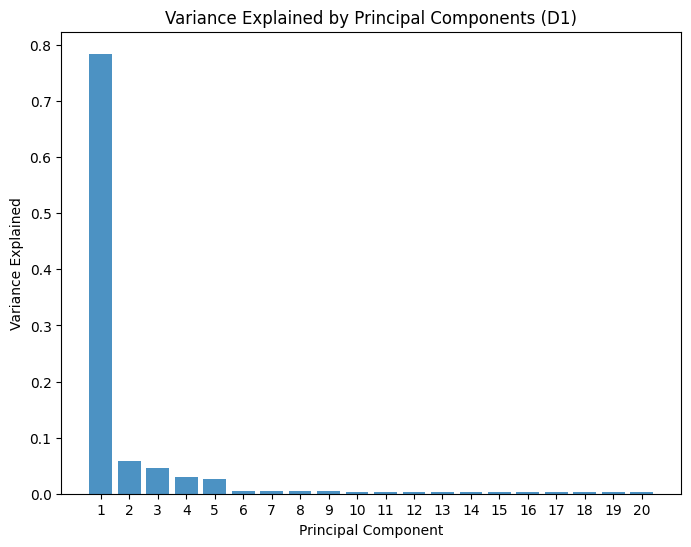

In [ ]:
import matplotlib.pyplot as plt

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Principal Components (D1)')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()


In [ ]:
pca = PCA(n_components=20)

pca_d2 = pca.fit_transform(d2)

# print("PCA on D1:\n", pca_d1)

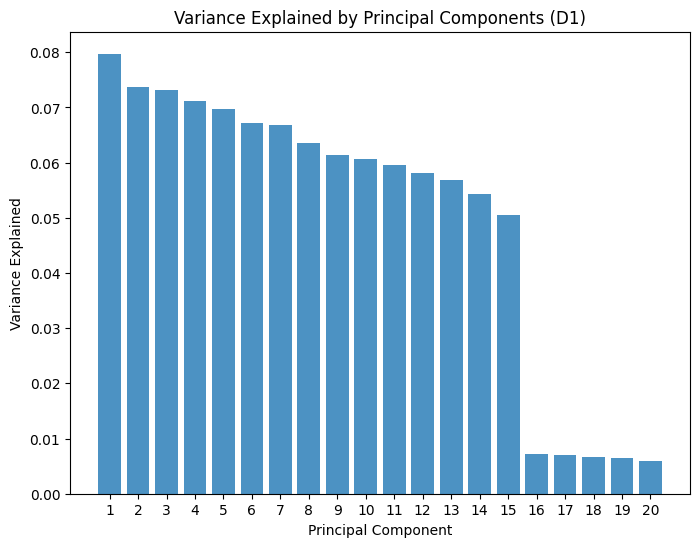

In [ ]:
import matplotlib.pyplot as plt

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Principal Components (D2)')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()


### Q1. Which dataset is more informative? Why?

The dataset D2 is more informative in the following way. You require more components to capture the information in the dataset. 95% of the information in D1 can be captured using 6-8 components in D1. Moreover, most of the information is captured in PC1 for D1.

### Q2. If you had to choose the number of principle components for these datasets what would you choose?

I would choose 8 principle components for D1, while for D2, I would go with 15-18. Though in real life, keeping all 20 doesn't hurt. The dataset is practically tiny and any algorithm will converge in a snap.

### Q3. Describe in your own words the variance profile of the PCA components for D1 and D2.

The variance profile of PCA components for D1 decays drastically with sequence of components. Not much information exists component 2 onwards, while the information in component 6-20 is almost nil. Contrarily, in D2, most of the components PC1 to PC15 encode significant amount of information.

### Q4. Can you have PC8 capturing lesser variance than PC10?
Nope. Think...

# Part A: 2. Reconstruction

In [ ]:
# Download the MNIST dataset from the given link

!pip install -q gdown
import gdown

shared_link = 'https://drive.google.com/file/d/1wZMEkvCKukb6vHCnsRgewdUN4mhHMad_/view?usp=drive_link'

# Convert the shared link to a downloadable link
file_id = shared_link.split('/d/')[1].split('/')[0]
download_url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
output_file = 'mnist_5000_images.npy'  # change extension as needed (e.g., .csv, .zip)
gdown.download(download_url, output_file, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1wZMEkvCKukb6vHCnsRgewdUN4mhHMad_
To: /content/mnist_5000_images.npy
100%|██████████| 3.92M/3.92M [00:00<00:00, 19.7MB/s]


'mnist_5000_images.npy'

There are a total of 5000 MNIST images indexed from 0 to 4999, each having a shape (1,28,28).

In [ ]:
# Load MNIST dataset

import numpy as np

mnist_data = np.load('mnist_5000_images.npy')         # shape: (5000, 1, 28, 28)

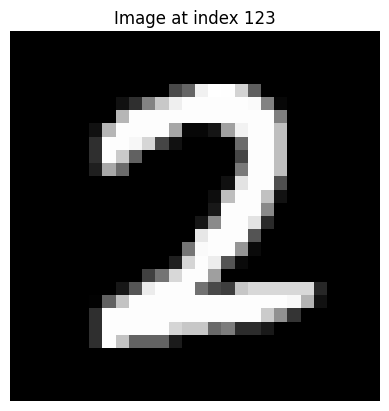

In [ ]:
# Visualize an MNIST image

import matplotlib.pyplot as plt

def show_mnist_image(data, index=0):

    image = data[index, 0]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f"Image at index {index}")
    plt.show()

# Select any image by choosing an index between 0 and 4999
show_mnist_image(mnist_data, index=123)

In [ ]:
# Fit PCA on the MNIST dataset

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# flatten the MNIST data from shape (5000,1,28,28) to (5000,784)
X = mnist_data.reshape((mnist_data.shape[0], -1))

# different PCA components
components_list = [10, 50, 100]
reconstructed_images = {}
errors = {}

for n_components in components_list:
    pca = PCA(n_components = n_components)

    # Transform and fit MNIST images using PCA components
    X_transformed = pca.fit_transform(X)

    # Inverse transform images
    X_reconstructed = pca.inverse_transform(X_transformed)

    # Store for visualization
    reconstructed_images[n_components] = X_reconstructed                        # Reconstructed Image from the PCA components
    errors[n_components] = mean_squared_error(X, X_reconstructed)               # Measure Reconstrunction error between the Original Image, and the Reconstructed Image


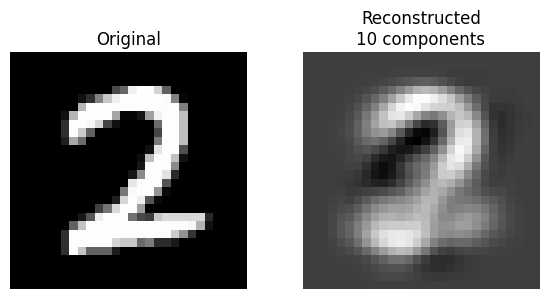

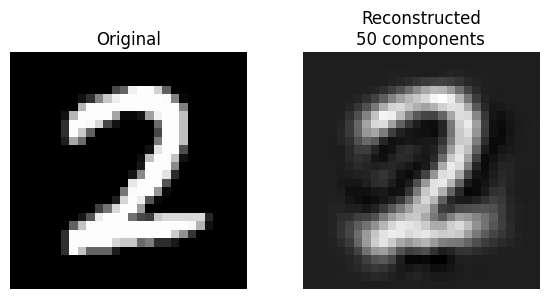

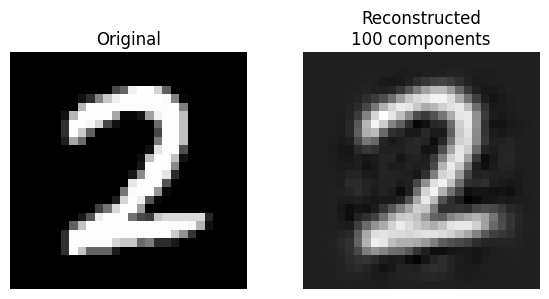

In [ ]:
# Plot the Original and Reconstructed images side by side.

def show_original_vs_reconstructed(original, reconstructed, index=0, n_components=10):
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))

    # Original Image
    axs[0].imshow(original[index].reshape(28, 28), cmap='gray')
    axs[0].set_title("Original")
    axs[0].axis('off')

    # Reconstructed Image
    axs[1].imshow(reconstructed[index].reshape(28, 28), cmap='gray')
    axs[1].set_title(f"Reconstructed\n{n_components} components")
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

# Example:
# Visualize the original and Reconstructed image pairs - with different PCA components
for n in components_list:
    show_original_vs_reconstructed(X, reconstructed_images[n], index=123, n_components=n)


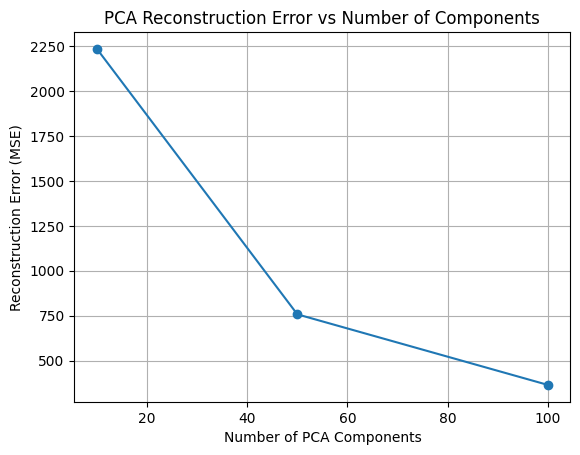

In [ ]:
# Measure Reconstruction error, for different PCA components

plt.figure()
plt.plot(list(errors.keys()), list(errors.values()), marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("Reconstruction Error (MSE)")
plt.title("PCA Reconstruction Error vs Number of Components")
plt.grid(True)
plt.show()


**Observations**

* As the number of PCA components increases, the clarity of the 'Reconstructed' MNIST digits also improve. <br>
* With a small number of components (e.g., 10), only the general shape of the digit is visible. <br>
* As we increase the number to 50 or 100, the reconstruction becomes sharper and closer to the original. <br><br>

This demonstrates that higher principal components capture more variance (i.e., more image details), leading to better reconstruction.

# t-SNE Assignment - Solution Notebook

In [ ]:
# Load MNIST dataset

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X, y = mnist.data, mnist.target.astype(int)

print("Data shape:", X.shape)

Data shape: (70000, 784)


## Part A: PCA - Reconstruction and Variance Analysis

In [ ]:
# Scale and run PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=100)

X_pca = pca.fit_transform(X_scaled)

X_recon = pca.inverse_transform(X_pca)

reconstruction_error = mean_squared_error(X_scaled, X_recon)

print("Reconstruction MSE with 100 components:", reconstruction_error)

In [ ]:
# Plot explained variance

plt.figure(figsize=(8, 5))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')

plt.ylabel('Cumulative Explained Variance')

plt.title('PCA - Explained Variance')

plt.grid(True)

plt.show()

## Part B: t-SNE - Perplexity and Visualization

In [ ]:
# Pre-reduce using PCA to 50 dims for t-SNE

pca_50 = PCA(n_components=50)

X_pca_50 = pca_50.fit_transform(X_scaled[:10000])

In [ ]:
# t-SNE with perplexity 5
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=5, learning_rate=200, n_iter=500, random_state=42)

X_tsne_5 = tsne.fit_transform(X_pca_50)

sns.scatterplot(x=X_tsne_5[:,0], y=X_tsne_5[:,1], hue=y[:10000], palette='tab10', legend=None)

plt.title('t-SNE with perplexity=5')

plt.show()

In [ ]:
# t-SNE with perplexity 30

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)

X_tsne_30 = tsne.fit_transform(X_pca_50)

sns.scatterplot(x=X_tsne_30[:,0], y=X_tsne_30[:,1], hue=y[:10000], palette='tab10', legend=None)

plt.title('t-SNE with perplexity=30')

plt.show()

In [ ]:
# t-SNE with perplexity 50

tsne = TSNE(n_components=2, perplexity=50, learning_rate=200, n_iter=1000, random_state=42)

X_tsne_50 = tsne.fit_transform(X_pca_50)

sns.scatterplot(x=X_tsne_50[:,0], y=X_tsne_50[:,1], hue=y[:10000], palette='tab10', legend=None)

plt.title('t-SNE with perplexity=50')

plt.show()

### Silhouette Scores

In [ ]:
# Calculate silhouette scores for each t-SNE

from sklearn.metrics import silhouette_score

scores = {}

for perplexity, data in zip([5, 30, 50], [X_tsne_5, X_tsne_30, X_tsne_50]):

    score = silhouette_score(data, y[:10000])

    scores[perplexity] = score

    print(f"Perplexity {perplexity}: Silhouette Score = {score:.4f}")